In [5]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
# data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv('survey_data.csv', sep = ',')

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [7]:
df.shape

(65437, 114)

In [8]:
df.duplicated().sum()

np.int64(0)

Checking for missing values

In [9]:
df.isna().sum().sort_values()

ResponseId                        0
MainBranch                        0
Age                               0
Employment                        0
Check                             0
                              ...  
EmbeddedAdmired               48704
AINextMuch more integrated    51999
AINextNo change               52939
AINextLess integrated         63082
AINextMuch less integrated    64289
Length: 114, dtype: int64

Data Cleaning Scope
To maintain a professional, bias-free analysis, we are only targeting the specific columns that directly drive our project goals. Focusing on these high-impact variables ensures our findings are accurate and actionable.

Targeted Columns for Analysis \
*Technology Trends*:

- Languages: `LanguageHaveWorkedWith`, `LanguageWantToWorkWith`

- Databases: `DatabaseHaveWorkedWith`, `DatabaseWantToWorkWith`

- Platforms: `PlatformHaveWorkedWith`, `PlatformWantToWorkWith`

- Web Frameworks: `WebframeHaveWorkedWith`, `WebframeWantToWorkWith`

*Demographics & Roles*: `Country`, `DevType`, and `EdLevel`.

*Experience & Salary*: `YearsCodePro`, `WorkExp`, and `ConvertedCompYearly`.

*Emerging Tech*: `AISelect`, `JobSatPoints_1`.

By limiting our cleaning and transformation to these specific fields, we preserve the integrity of the dataset while focusing our efforts on the data that truly matters for the final presentation.

In [10]:
df['Country'].unique()

array(['United States of America',
       'United Kingdom of Great Britain and Northern Ireland', 'Canada',
       'Norway', 'Uzbekistan', 'Serbia', 'Poland', 'Philippines',
       'Bulgaria', 'Switzerland', 'India', 'Germany', 'Ireland', 'Italy',
       'Ukraine', 'Australia', 'Brazil', 'Japan', 'Austria',
       'Iran, Islamic Republic of...', 'France', 'Saudi Arabia',
       'Romania', 'Turkey', 'Nepal', 'Algeria', 'Sweden', 'Netherlands',
       'Croatia', 'Pakistan', 'Czech Republic',
       'Republic of North Macedonia', 'Finland', 'Slovakia',
       'Russian Federation', 'Greece', 'Israel', 'Belgium', 'Mexico',
       'United Republic of Tanzania', 'Hungary', 'Argentina', 'Portugal',
       'Sri Lanka', 'Latvia', 'China', 'Singapore', 'Lebanon', 'Spain',
       'South Africa', 'Lithuania', 'Viet Nam', 'Dominican Republic',
       'Indonesia', 'Kosovo', 'Morocco', 'Taiwan', 'Georgia',
       'San Marino', 'Tunisia', 'Bangladesh', 'Nigeria', 'Liechtenstein',
       'Denmark', 'Ecu

In [11]:
print(df['Country'].isna().sum())

6507


In [12]:
df['DevType'].unique()

array([nan, 'Developer, full-stack', 'Developer Experience', 'Student',
       'Academic researcher', 'Project manager', 'Developer Advocate',
       'Developer, back-end', 'Other (please specify):',
       'Developer, front-end', 'Database administrator',
       'Developer, desktop or enterprise applications',
       'Cloud infrastructure engineer',
       'Data scientist or machine learning specialist',
       'Research & Development role',
       'Developer, embedded applications or devices',
       'System administrator', 'DevOps specialist', 'Engineering manager',
       'Designer', 'Security professional',
       'Senior Executive (C-Suite, VP, etc.)', 'Developer, mobile',
       'Developer, game or graphics', 'Data or business analyst',
       'Educator', 'Developer, QA or test', 'Product manager',
       'Developer, AI', 'Scientist', 'Engineer, site reliability',
       'Blockchain', 'Marketing or sales professional',
       'Hardware Engineer', 'Data engineer'], dtype=object)

In [13]:
print(df['DevType'].isna().sum())

5992


In [14]:
df['EdLevel'].unique()

array(['Primary/elementary school',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Associate degree (A.A., A.S., etc.)', 'Something else', nan],
      dtype=object)

In [15]:
print(df['EdLevel'].isna().sum())

4653


In [16]:
# 1. Handle 'Country' (6,507 missing)
# Strategy: Label as "Other/Not Specified" to keep data without guessing the region.
df['Country'] = df['Country'].fillna('Other/Not Specified')

# 2. Handle 'DevType' (5,992 missing)
# Strategy: Label as "Other" instead of guessing a specific role like 'Mobile Dev'.
df['DevType'] = df['DevType'].fillna('Other')

# 3. Handle 'EdLevel' (4,653 missing)
# Strategy: Mode Imputation. Since a Bachelor's is the clear industry standard,
# filling with the most frequent value is a safe statistical bet.
ed_mode = df['EdLevel'].mode()[0]
df['EdLevel'] = df['EdLevel'].fillna(ed_mode)

# Verification: Checking if missing values are gone
print(df[['Country', 'DevType', 'EdLevel']].isna().sum())

Country    0
DevType    0
EdLevel    0
dtype: int64


To handle the missing values in the `AISelect` column (which has 4,530 missing entries), we will use the `K-Nearest Neighbors (KNN)` classification approach. We could have used the simple mode imputation but using a classification algorithm is often more accurate than simple Mode imputation because it predicts the missing value based on other features (like `Age`, `Country`, or `Devtype`) rather than just guessing "the most popular one."

In [17]:
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

# prepare the data
features = ['CompTotal', 'WorkExp', 'YearsCode']
df[features] = df[features].fillna(0)

In [18]:
# Encode 'AISelect' (Text -> Numbers)
encoder = LabelEncoder()
known = df['AISelect'].notna()
df.loc[known, 'AISelect_num'] = encoder.fit_transform(df.loc[known, 'AISelect'])

In [19]:
df['AISelect_num'].isna().sum()

np.int64(4530)

In [20]:
# This will be the feature matrix
df.loc[known, features].head()

,CompTotal,WorkExp,YearsCode
0,0.0,0.0,0
1,0.0,17.0,20
2,0.0,0.0,37
3,0.0,0.0,4
4,0.0,0.0,9


In [21]:
# This will be the target vector
df.loc[known, 'AISelect_num'].head()

0    2.0
1    0.0
2    0.0
3    2.0
4    0.0
Name: AISelect_num, dtype: float64

In [22]:
# YearsCode column is object type and contains string type values
df['YearsCode'].unique()

array([0, '20', '37', '4', '9', '10', '7', '1', '15', '30', '31', '6',
       '12', '22', '5', '36', '25', '44', '24', '18', '3', '8',
       'More than 50 years', '11', '29', '40', '39', '2', '42', '34',
       '19', '35', '16', '33', '13', '23', '14', '28', '17', '21', '43',
       '46', '26', '32', '41', '45', '27', '38', '50', '48', '47',
       'Less than 1 year', '49'], dtype=object)

In [23]:
df['YearsCode'] = df['YearsCode'].replace({'More than 50 years': '51',
                                          'Less than 1 year': '0'})
df['YearsCode'] = pd.to_numeric(df['YearsCode'], errors='coerce')
df['YearsCode'].unique()

array([ 0, 20, 37,  4,  9, 10,  7,  1, 15, 30, 31,  6, 12, 22,  5, 36, 25,
       44, 24, 18,  3,  8, 51, 11, 29, 40, 39,  2, 42, 34, 19, 35, 16, 33,
       13, 23, 14, 28, 17, 21, 43, 46, 26, 32, 41, 45, 27, 38, 50, 48, 47,
       49])

In [24]:
# Training on rows that have AISelect
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(df.loc[known, features], df.loc[known, 'AISelect_num'])

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [25]:
# Predict missing AISelect values
missing = df['AISelect'].isna()
predicted = knn.predict(df.loc[missing, features])
pd.Series(predicted).head()

0    2.0
1    2.0
2    2.0
3    2.0
4    2.0
dtype: float64

In [26]:
df.loc[missing, 'AISelect'] = encoder.inverse_transform(predicted.astype(int))

In [27]:
df['AISelect'].isna().sum()

np.int64(0)

Now time to restore the data back to as it was before.

In [28]:
import numpy as np
df.drop(columns='AISelect_num', inplace=True)

In [29]:
df[features] = df[features].replace(0, np.nan)

In [30]:
df[features].isna().sum().sort_values()

YearsCode     6137
CompTotal    31824
WorkExp      35971
dtype: int64

In [31]:
df['YearsCodePro'].unique()

array([nan, '17', '27', '7', '11', '25', '12', '10', '3',
       'Less than 1 year', '18', '37', '15', '20', '6', '2', '16', '8',
       '14', '4', '45', '1', '24', '29', '5', '30', '26', '9', '33', '13',
       '35', '23', '22', '31', '19', '21', '28', '34', '32', '40', '50',
       '39', '44', '42', '41', '36', '38', 'More than 50 years', '43',
       '47', '48', '46', '49'], dtype=object)

To handle YearsCodePro (which has 13,827 missing values), we will use Median Imputation

In [32]:
# 1. Clean the Text Values
# Replace strings with numbers so we can do math
df['YearsCodePro'] = df['YearsCodePro'].replace('Less than 1 year', 0)
df['YearsCodePro'] = df['YearsCodePro'].replace('More than 50 years', 51)

# 2. Convert to Numeric
# Using to_numeric to convert the column to numeric type in order to perform math operations. Any remaining messy text becomes NaN.
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# 3. Calculate the Median
# We use median because it ignores outliers.
experience_median = df['YearsCodePro'].median()

# 4. Fill the Missing Values
df['YearsCodePro'] = df['YearsCodePro'].fillna(experience_median)

# Verification
print(f"Median used for imputation: {experience_median}")
print(f"Remaining missing values in YearsCodePro: {df['YearsCodePro'].isna().sum()}")

Median used for imputation: 7.0
Remaining missing values in YearsCodePro: 0


Columns we cleaned so far: `Country`, `DevType`, `EdLevel`, `AISelect`, `YearsCodePro`. \
Now let's work with Technology Trends columns which are necessary for Dashboard building.

In [33]:
df['LanguageHaveWorkedWith'].value_counts()

LanguageHaveWorkedWith
HTML/CSS;JavaScript;TypeScript                                                     1002
Python                                                                              832
HTML/CSS;JavaScript;PHP;SQL                                                         503
C#                                                                                  452
HTML/CSS;JavaScript                                                                 452
                                                                                   ... 
C#;JavaScript;Lua                                                                     1
C;HTML/CSS;JavaScript;Julia;PowerShell;Python;TypeScript                              1
Bash/Shell (all shells);Go;HTML/CSS;JavaScript;Python;Ruby;Scala;SQL;TypeScript       1
Assembly;C++;Go;HTML/CSS;JavaScript;Julia;Lisp;PHP;Prolog;Rust;SQL;TypeScript         1
Assembly;C;C++;Rust;VBA                                                               1
Name: cou

In [34]:
df['PlatformHaveWorkedWith'].value_counts()

PlatformHaveWorkedWith
Amazon Web Services (AWS)                                                                                           6606
Microsoft Azure                                                                                                     4084
Google Cloud                                                                                                        1812
Amazon Web Services (AWS);Microsoft Azure                                                                           1521
Amazon Web Services (AWS);Google Cloud                                                                              1218
                                                                                                                    ... 
Netlify;Render;Scaleway;Supabase;Vercel                                                                                1
Amazon Web Services (AWS);Cloudflare;Digital Ocean;Firebase;Google Cloud;Microsoft Azure;Supabase;VMware               1
Amazon We

In [35]:
df['DatabaseHaveWorkedWith'].value_counts()

DatabaseHaveWorkedWith
PostgreSQL                                                              3216
Microsoft SQL Server                                                    2239
MySQL                                                                   2099
SQLite                                                                  1762
PostgreSQL;SQLite                                                       1172
                                                                        ... 
Cloud Firestore;Dynamodb;Firebase Realtime Database                        1
Elasticsearch;MySQL;Solr;SQLite                                            1
InfluxDB;MariaDB;Microsoft Access;MySQL;Oracle;PostgreSQL;SQLite           1
Cassandra;Dynamodb;Elasticsearch;Firebird;H2;Redis                         1
Cassandra;DuckDB;Dynamodb;H2;MariaDB;MongoDB;PostgreSQL;Redis;SQLite       1
Name: count, Length: 9050, dtype: int64

In [36]:
df['LanguageWantToWorkWith'].value_counts()

LanguageWantToWorkWith
Python                                                                                              922
Rust                                                                                                737
HTML/CSS;JavaScript;TypeScript                                                                      632
C#                                                                                                  538
Go                                                                                                  460
                                                                                                   ... 
C;Go;HTML/CSS;Java;JavaScript;Rust;Solidity                                                           1
Assembly;C;C#;F#;HTML/CSS;Java;Kotlin;Lisp;OCaml;Python;SQL                                           1
Bash/Shell (all shells);C#;Go;Java;JavaScript;Python;Rust;TypeScript                                  1
Bash/Shell (all shells);C#;Dart;JavaScrip

By looking at the data we can see that the survey allowed to select multiple options at once so we need to split the data using the `.str.split()` method which then returns a list of elements. Then we use the `.explode` method to explode the list into separate rows. To avoid repeating the same step we will simply write a function that does the task for us.

In [37]:
df['LanguageHaveWorkedWith'].isna().sum()

np.int64(5692)

In [38]:
def get_top_10(df, column_name):
    # 1. Drop missing values (List-wise deletion strategy)
    data = df[column_name].dropna()

    # 2. Split string "Python;SQL" -> list ["Python", "SQL"]
    data = df[column_name].str.split(';')

    # 3. Explode list into separate rows
    exploded_data = data.explode()

    # 4. Count and take top 10
    return exploded_data.value_counts().reset_index().head(10)

top_languages_current = get_top_10(df, 'LanguageHaveWorkedWith')
top_languages_future = get_top_10(df, 'LanguageWantToWorkWith')

top_languages_current.head(5)

,LanguageHaveWorkedWith,count
0,JavaScript,37492
1,HTML/CSS,31816
2,Python,30719
3,SQL,30682
4,TypeScript,23150


In [39]:
type(top_languages_current)

pandas.core.frame.DataFrame

In [40]:
# Re-using the get_top_10 function from the previous step
top_db_current = get_top_10(df, 'DatabaseHaveWorkedWith')
top_db_future = get_top_10(df, 'DatabaseWantToWorkWith')
top_platforms_current = get_top_10(df, 'PlatformHaveWorkedWith')
top_platforms_future = get_top_10(df, 'PlatformWantToWorkWith')
top_webframe_current = get_top_10(df, 'WebframeHaveWorkedWith')
top_webframe_future = get_top_10(df, 'WebframeWantToWorkWith')

Now we need to convert each series data to a csv file which will be used in future for analyzing tech trends and building a dashboard.

In [41]:
def convert_to_csv(df, filename):
    df.to_csv(filename, index=False)

convert_to_csv(top_languages_current, 'top_languages_current.csv')
convert_to_csv(top_languages_future, 'top_languages_future.csv')
convert_to_csv(top_db_current, 'clean_TopDB_current')
convert_to_csv(top_db_future, 'clean_TopDB_future')
convert_to_csv(top_platforms_current, 'top_platforms_current.csv')
convert_to_csv(top_platforms_future, 'top_platforms_future.csv')
convert_to_csv(top_webframe_current, 'top_webframe_current.csv')
convert_to_csv(top_webframe_future, 'top_webframe_future.csv')

In [42]:
df.isna().sum().sort_values()

ResponseId                        0
MainBranch                        0
Age                               0
Employment                        0
Check                             0
                              ...  
EmbeddedAdmired               48704
AINextMuch more integrated    51999
AINextNo change               52939
AINextLess integrated         63082
AINextMuch less integrated    64289
Length: 114, dtype: int64

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Handle Salary Outliers
# We use the Interquartile Range (IQR) to find the "fence"
salary = df['ConvertedCompYearly'].dropna()
Q1 = salary.quantile(0.25)
Q3 = salary.quantile(0.75)
IQR = Q3 - Q1

# Define the boundaries (Standard statistical rule: 1.5 * IQR)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a filtered dataframe without the crazy outliers
df_clean_salary = df[(df['ConvertedCompYearly'] >= lower_bound) &
                     (df['ConvertedCompYearly'] <= upper_bound)]

print(f"Original Rows: {len(df)}")
print(f"Rows after removing NaN values & outliers: {len(df_clean_salary)}")

Original Rows: 65437
Rows after removing NaN values & outliers: 22457


In [44]:
# Calculate median salary per education level
edu_salary = df_clean_salary.groupby('EdLevel')['ConvertedCompYearly'].median().sort_values()
edu_salary

EdLevel
Primary/elementary school                                                             33165.0
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)    44221.5
Something else                                                                        53703.0
Some college/university study without earning a degree                                56925.0
Associate degree (A.A., A.S., etc.)                                                   59073.0
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          64444.0
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       65271.0
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                        75184.0
Name: ConvertedCompYearly, dtype: float64

Visualization 1 - Education vs. Salary

C:\Users\usaid\AppData\Local\Temp\ipykernel_42604\3613497637.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=edu_salary.values, y=edu_salary.index, palette='mako')


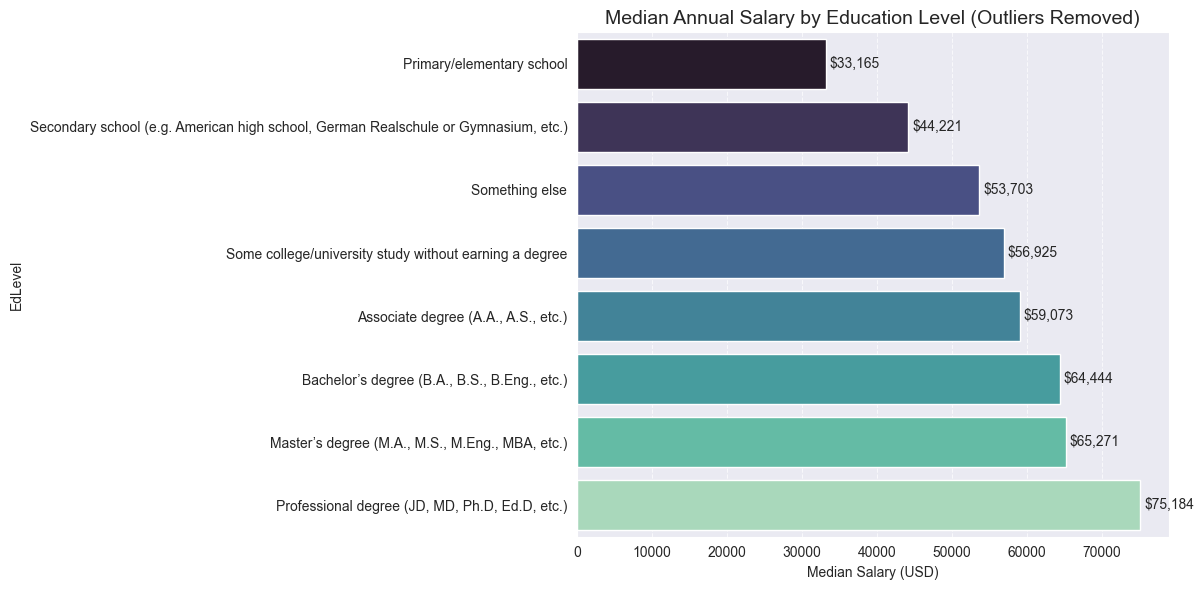

In [45]:

plt.figure(figsize=(12, 6))

# Plot
ax = sns.barplot(x=edu_salary.values, y=edu_salary.index, palette='mako')
plt.title('Median Annual Salary by Education Level (Outliers Removed)', fontsize=14)
plt.xlabel('Median Salary (USD)')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add value labels
for i, v in enumerate(edu_salary.values):
    ax.text(v + 500, i, f"${int(v):,}", va='center')

plt.tight_layout()
plt.show()


Visualization 2 - Experience vs. Salary Scatter

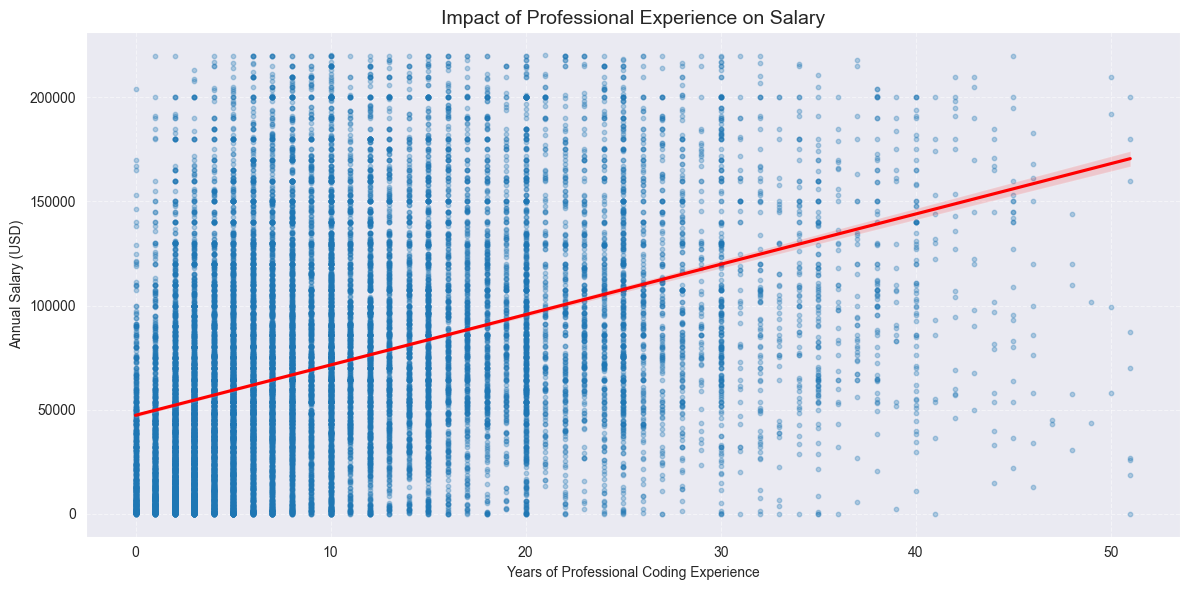

In [46]:
plt.figure(figsize=(12, 6))

# Scatter plot with a regression line to show the trend
sns.regplot(x='YearsCodePro', y='ConvertedCompYearly', data=df_clean_salary,
            scatter_kws={'alpha':0.3, 's':10}, line_kws={'color':'red'})

plt.title('Impact of Professional Experience on Salary', fontsize=14)
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Annual Salary (USD)')
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [47]:
convert_to_csv(top_db_current, 'top_db_current.csv')
convert_to_csv(top_db_future, 'top_db_future.csv')

In [52]:
df['EdLevel'].isna().sum()

np.int64(0)

In [53]:
convert_to_csv(df, 'cleaned_survey_data.csv')

Since we're unable to upload the full dataset to the IBM Cognos tool because of the large file size, we will make a copy with only necessary columns.

In [54]:
demo_columns = [
    'ResponseId',
    'Age',
    'Country',
    'EdLevel',
    'Employment',
    'RemoteWork',
    'DevType'
]

# Create the smaller dataframe
df_demo_lite = df[demo_columns].copy()

# Save it
df_demo_lite.to_csv('survey_data_demographics_lite.csv', index=False)

print("Success! 'survey_data_demographics_lite.csv' has been created.")

Success! 'survey_data_demographics_lite.csv' has been created.


In [55]:
df['Country'].value_counts()

Country
United States of America                                11095
Other/Not Specified                                      6507
Germany                                                  4947
India                                                    4231
United Kingdom of Great Britain and Northern Ireland     3224
                                                        ...  
Micronesia, Federated States of...                          1
Nauru                                                       1
Chad                                                        1
Djibouti                                                    1
Solomon Islands                                             1
Name: count, Length: 186, dtype: int64

In [56]:
# --- Create Pre-Aggregated Files for Demographics ---

# 1. Age Distribution (For Pie Chart)
age_counts = df['Age'].value_counts().reset_index()
age_counts.columns = ['Age Group', 'Count']
age_counts.to_csv('clean_demo_age.csv', index=False)

# 2. Country Distribution (For Map)
country_counts = df['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Count']
country_counts.to_csv('clean_demo_country.csv', index=False)

# 3. Education Level (For Line Chart)
# We sort by count to make the line chart look organized
ed_counts = df['EdLevel'].value_counts().reset_index()
ed_counts.columns = ['Education Level', 'Count']
ed_counts.to_csv('clean_demo_education.csv', index=False)

print("Success! Created 3 clean files:")
print("1. clean_demo_age.csv")
print("2. clean_demo_country.csv")
print("3. clean_demo_education.csv")

Success! Created 3 clean files:
1. clean_demo_age.csv
2. clean_demo_country.csv
3. clean_demo_education.csv


In [61]:
# "Bad Name" : "Good Name"
fixes = {
    "Democratic People's Republic of Korea": "North Korea",
    "Republic of Korea": "South Korea",
    "Iran, Islamic Republic of...": "Iran",
    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
    "United States of America": "United States",
    "Congo, Republic of the...": "Congo",
    "Libyan Arab Jamahiriya": "Libya",
    "Micronesia, Federated States of...": "Micronesia",
    "Hong Kong (S.A.R.)": "Hong Kong",
    "Other/Not Specified": "Other",
    "Venezuela, Bolivarian Republic of...": "Venezuela",
    "Democratic Republic of the Congo": "Congo",
    "Jamahiriya": "Libya"
}

# 3. Apply the fixes
country_counts['Country'] = country_counts['Country'].replace(fixes)

# 4. CRITICAL STEP: Group by the new names and SUM the counts
# This merges the 2 original North Koreas with the 3 Renamed ones = 5 Total
country_counts_fixed = country_counts.groupby('Country')['Count'].sum().reset_index()

# 5. Sort descending (optional, but looks nice)
country_counts_fixed = country_counts_fixed.sort_values(by='Count', ascending=False)

# 6. Save the fixed file
country_counts_fixed.to_csv('clean_demo_country_fixed.csv', index=False)